In [1]:
#Description : This program detects breast cancer, based off of data

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data
#Wisconsin Diagnosis Breast Cancer data set
df = pd.read_csv('breast_cancer_data.csv')
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [4]:
#Count the number of row and columns in the data set
df.shape

(569, 33)

In [5]:
#count the number of empty (NaN,NAN,na) values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#drop the column with all missing values
df = df.dropna(axis=1)

In [7]:
#Get the new count of the number of rows and columns
df.shape

(569, 32)

In [8]:
#Get a count of the number of Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

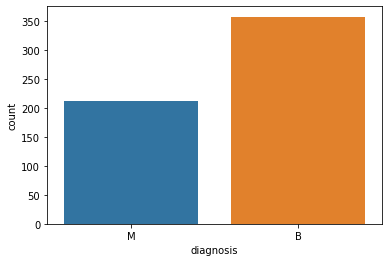

In [9]:
#Visualize the count
sns.countplot(df['diagnosis'],label='count')

In [10]:
#Look st the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
#Encode the categorical data values
#M=1 B=0
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

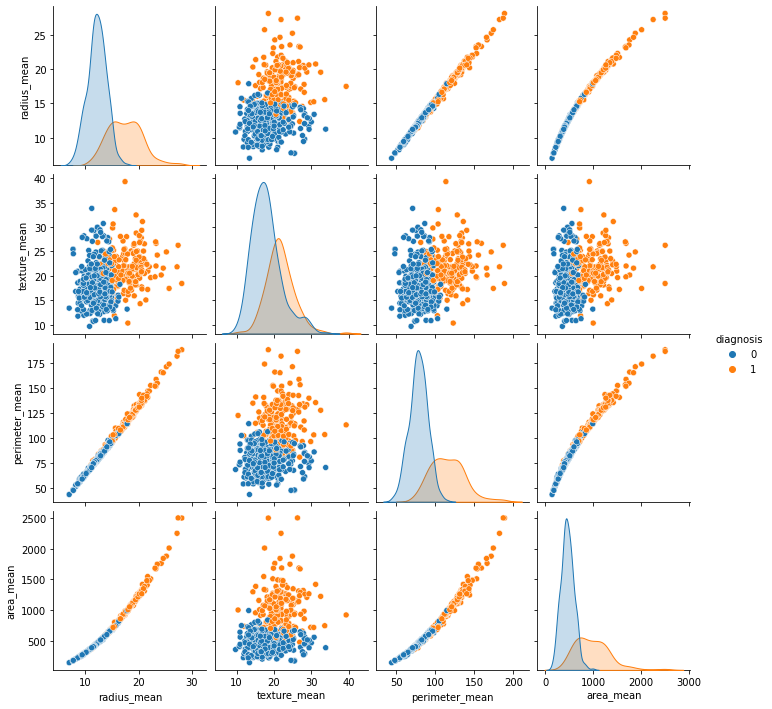

In [12]:
#Creat a pair plot
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

In [13]:
#print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
#Get the correlation of the columns
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot: >

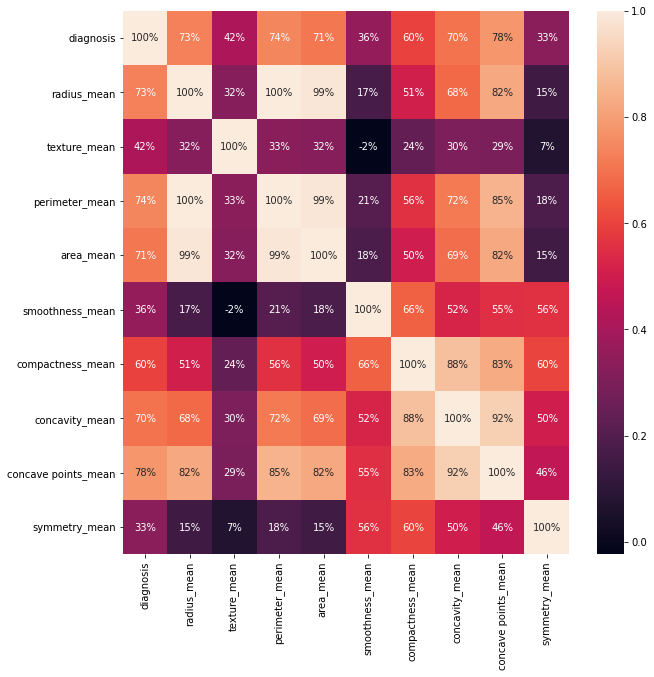

In [15]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(),annot=True, fmt='.0%')

In [16]:
#split the data set into independent(Y) and dependent(X) data sets
X = df.iloc[:,2:32].values
Y = df.iloc[:,1].values

In [17]:
#Split the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.30 , random_state = 0)

In [18]:
#Scale the data (Feature Scaling)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
#Create a function for models

def models(X_train,Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy' , random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    #Adaboost classifier
    from sklearn.ensemble import AdaBoostClassifier
    adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',random_state=200),
                                            n_estimators=2000,
                                            learning_rate=0.1,
                                            algorithm='SAMME.R',
                                            random_state = 1   
                                       )
    adb_classifier.fit(X_train, Y_train)
    
    # XGBoost Classifier
    #from xgboost import XGBClassifier
    from xgboost import XGBClassifier
    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(X_train, Y_train)

    #Print the models accuracy on the training data
    print('[0] Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
    print('[1] Decision Tree Classifier Training Accuracy:',tree.score(X_train,Y_train))
    print('[2] Random Forest CLassifier Training Accuracy:',forest.score(X_train,Y_train))
    print('[3] Adaboost CLassifier Training Accuracy:',adb_classifier.score(X_train,Y_train))
    print('[4] XGBoost CLassifier Training Accuracy:',xgb_classifier.score(X_train,Y_train))
    
    return log,tree,forest,adb_classifier,xgb_classifier

In [20]:
#Getting all of the models
model = models(X_train,Y_train)

[14:42:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0] Logistic Regression Training Accuracy: 0.9899497487437185
[1] Decision Tree Classifier Training Accuracy: 1.0
[2] Random Forest CLassifier Training Accuracy: 0.9949748743718593
[3] Adaboost CLassifier Training Accuracy: 1.0
[4] XGBoost CLassifier Training Accuracy: 1.0


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [21]:
#test model accuracy o test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    
    print('Model',i)
    cn = confusion_matrix(Y_test,model[i].predict(X_test))
    
    TP = cn[0][0]
    TN = cn[1][1]
    FN = cn[1][0]
    FP = cn[0][1]
    
    print(cn)
    print('Testing Accuracy=',(TP + TN)/(TP + TN + FN + FP))
    print('Specificity=',TN/(FP+TN))
    print()

Model 0
[[104   4]
 [  2  61]]
Testing Accuracy= 0.9649122807017544
Specificity= 0.9384615384615385

Model 1
[[100   8]
 [  5  58]]
Testing Accuracy= 0.9239766081871345
Specificity= 0.8787878787878788

Model 2
[[104   4]
 [  3  60]]
Testing Accuracy= 0.9590643274853801
Specificity= 0.9375

Model 3
[[98 10]
 [ 5 58]]
Testing Accuracy= 0.9122807017543859
Specificity= 0.8529411764705882

Model 4
[[105   3]
 [  3  60]]
Testing Accuracy= 0.9649122807017544
Specificity= 0.9523809523809523



In [22]:
#Show another way to get matrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model',i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print(accuracy_score(Y_test,model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

0.9649122807017544

Model 1
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171

0.9239766081871345

Model 2
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted a

In [23]:
#print the prediction of random forest classifier model
pred = model[4].predict(X_test)

#predicted value
print("This is predict value using model")
print(pred)
print()
print("This is Actual value which is given under data set")
#actual Valu
print(Y_test)

This is predict value using model
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]

This is Actual value which is given under data set
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [24]:
input_data = (15.3, 25.27, 102.4, 732.4, 0.1082, 0.1697, 0.1683, 0.08751, 0.1926, 0.0654, 0.439, 1.012, 3.498, 43.5, 0.005233, 0.03057, 0.03576, 0.01083, 0.01768, 0.002967, 20.27, 36.71, 149.3, 1269, 0.1641, 0.611, 0.6335, 0.2024, 0.4027, 0.09876)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model[2].predict(input_data_reshaped)
# print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

The Breast cancer is Malignant
